## Covid-19 Analysis and Visualization using Plotly Express
---

##### Introduction

---

As a data analyst, my primary focus in this project was to explore and visualize COVID-19 data using Python, with an emphasis on creating high-quality, interactive charts through Plotly Express. While the dataset covers the global impact of the pandemic, I placed special focus on **Nigeria**; analyzing trends in confirmed cases, deaths, and recoveries within the country while still examining how these patterns compare with those in other parts of the world.

The aim was to turn complex datasets into meaningful insights that highlight both local and global pandemic trends. By combining daily data tracking, visual analytics, and contextual interpretation, I was able to identify key developments in Nigeria's response to COVID-19 while keeping the broader international situation in view. This approach helps stakeholders understand how the pandemic evolved in Nigeria relative to global trends and provides insights that support better decision-making at both national and global levels.

---
##### Datasets Used
- covid Dataset
Contains aggregated country-level data with the following columns:

Country/Region, Continent, Population, TotalCases, NewCases,
TotalDeaths, NewDeaths, TotalRecovered, NewRecovered,
ActiveCases, Serious, Critical, Tot Cases/1M pop,
Deaths/1M pop, TotalTests, Tests/1M pop, WHO Region, iso_alpha.

- covid_grouped Dataset
Provides daily data from 2020-01-22 to 2020-07-27 across countries, including:

Date, Country/Region, Confirmed, Deaths, Recovered, Active,
New cases, New deaths, New recovered, WHO Region, iso_alpha.

- coviddeath Dataset
Contains real-world examples of COVID-19-related deaths, including causes and contributing factors, used to analyze mortality and fatality trends globally.

##### Tools and Technologies Used
Platform: Jupyter Notebooks

Libraries & Technologies:

- Python (Basic knowledge required)

- Pandas

- NumPy

- Matplotlib

- Plotly Express

- Choropleth maps

- WordCloud

- Data visualization principles

- Understanding of graphs and charts


#### Importing Libraries

In [83]:
# Data analysis and Manipulation
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt

# Importing Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Initializing Plotly
pio.renderers.default = 'colab'

In [84]:
# Importing Dataset1
dataset1 = pd.read_csv("covid.csv")
dataset1.head()  # returns first 5 rows

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


In [85]:
# Returns tuple of shape (Rows, columns)
print(dataset1.shape)

# Returns size of dataframe
print(dataset1.size)

(209, 17)
3553


In [86]:
# Information about Dataset1
# return concise summary of dataframe
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [87]:
# Columns labels of a Dataset1
dataset1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [88]:
# Drop NewCases, NewDeaths, NewRecovered rows from dataset1

dataset1.drop(['NewCases', 'NewDeaths', 'NewRecovered'], 
              axis=1, inplace=True)

# Select random set of values from dataset1
dataset1.sample(5)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
187,Antigua and Barbuda,North America,98010.0,92,3.0,76.0,13.0,1.0,939.0,31.0,1500.0,15305.0,Americas,ATG
77,Madagascar,Africa,27755708.0,12526,134.0,10148.0,2244.0,88.0,451.0,5.0,46301.0,1668.0,Africa,MDG
10,Iran,Asia,84097623.0,320117,17976.0,277463.0,24678.0,4156.0,3806.0,214.0,2612763.0,31068.0,EasternMediterranean,IRN
11,UK,Europe,67922029.0,308134,46413.0,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe,UKR
168,Mongolia,Asia,3283344.0,293,NaN,260.0,33.0,1.0,89.0,NaN,38334.0,11675.0,WesternPacific,MNG


In [89]:
# Import create_table Figure Factory

from plotly.figure_factory import create_table

colorscale = [[0, '#001f4d'], [0.5, '#b3cce6'], [1, '#ffffff']]
table = create_table(dataset1.head(15), colorscale=colorscale)
py.iplot(table)

#### Bar graphs- Comparisons between COVID infected countries in terms of total cases, total deaths, total recovered & total tests

In [91]:
px.bar(dataset1.head(15), x = 'Country/Region', 
       y = 'TotalCases',color = 'TotalCases', 
       height = 500,hover_data = ['Country/Region', 'Continent'])

#total number of cases by top 15 countries only and color total cases and hover data as 'Country/Region', 'Continent'.

In [92]:
#This code creates a bar chart showing the top 15 countries by total COVID-19 cases, with bar heights representing case counts 
# and bar colors indicating the number of deaths.

px.bar(
    dataset1.head(15),                 
    x='Country/Region',                
    y='TotalCases',                   
    color='TotalDeaths',              
    height=500,                        
    hover_data=['Country/Region', 'Continent']  
)

In [93]:
#This code creates a bar chart showing the top 15 countries by total COVID-19 cases, with bar heights representing case counts 
#and bar colors indicating the number of Tests.

px.bar(dataset1.head(15), x = 'Country/Region', y = 'TotalCases',
       color = 'TotalTests', height = 500,
       hover_data = ['Country/Region', 'Continent'])

In [94]:
px.bar(dataset1.head(15), x = 'TotalTests', y = 'Continent',
       color = 'TotalTests',orientation ='h',  height = 500,
       hover_data = ['Country/Region', 'Continent'])

#### Data Visualization through Bubble Charts-Continent Wise

In [96]:
#This code creates a scatter plot showing countries grouped by continent, where each bubble’s size 
#and color represent the total number of COVID-19 cases.

px.scatter(dataset1, x='Continent',y='TotalCases', 
           hover_data=['Country/Region', 'Continent'], 
           color='TotalCases', size='TotalCases', size_max=80)

In [97]:
#This code creates a scatter plot of the first 50 countries, grouped by continent, 
#where each bubble's size and color show total COVID-19 cases, 
#and the y-axis uses a logarithmic scale to better visualize differences in case numbers.

px.scatter(dataset1.head(50), x='Continent',y='TotalCases', 
           hover_data=['Country/Region', 'Continent'], 
           color='TotalCases', size='TotalCases', size_max=80, log_y=True)

In [98]:
# For total Tests
px.scatter(dataset1.head(54), x='Continent',y='TotalTests', 
           hover_data=['Country/Region', 'Continent'], 
           color='TotalTests', size='TotalTests', size_max=80)

In [99]:
#For Total Tests using Log

px.scatter(dataset1.head(50), x='Continent',y='TotalTests', 
           hover_data=['Country/Region', 'Continent'], 
           color='TotalTests', size='TotalTests', size_max=80, log_y=True)

#### Data Visualization through Bubble Charts-Country Wise

In [101]:
px.scatter(dataset1.head(100), x='Country/Region', y='TotalCases', 
           hover_data=['Country/Region', 'Continent'],
           color='TotalCases', size='TotalCases', size_max=80)

In [102]:
# This code creates a scatter plot of the first 30 countries, where each bubble's size represents the total number of COVID-19 cases, 
#the x-axis shows the country, the y-axis uses a logarithmic scale for total cases, and each country is shown in a different color.

px.scatter(dataset1.head(30), x='Country/Region', y='TotalCases', 
           hover_data=['Country/Region', 'Continent'],
           color='Country/Region', size='TotalCases', size_max=80, log_y=True)

In [103]:
# Total Death by Countries/Region

px.scatter(dataset1.head(10), x='Country/Region', y= 'TotalDeaths', 
           hover_data=['Country/Region', 'Continent'],
           color='Country/Region', size= 'TotalDeaths', size_max=80)

#### Country/Region VS Tests/1M pop (color-scale of Tests/1M pop)

In [105]:
#This code creates a scatter plot of the first 30 countries, where each bubble's size and color 
#represent the number of COVID-19 tests per 1 million people, and the x-axis displays the country/region.

px.scatter(dataset1.head(30), x='Country/Region', y= 'Tests/1M pop', 
           hover_data=['Country/Region', 'Continent'],
           color='Tests/1M pop', size= 'Tests/1M pop', size_max=80)

In [106]:
#This code creates a scatter plot of the first 30 countries, 
#where each bubble's position reflects total COVID-19 cases and deaths,
#while the size and color of the bubbles represent the number of total deaths.


px.scatter(dataset1.head(30), x='TotalCases', y= 'TotalDeaths', 
           hover_data=['Country/Region', 'Continent'],
           color='TotalDeaths', size= 'TotalDeaths', size_max=80)

In [107]:
#This code creates a scatter plot of the first 30 countries, 
#where each bubble’s position represents total COVID-19 cases and deaths on logarithmic axes, 
#and the bubble’s size and color reflect the number of total deaths.


px.scatter(dataset1.head(30), x='TotalCases', y= 'TotalDeaths', 
           hover_data=['Country/Region', 'Continent'],
           color='TotalDeaths', size= 'TotalDeaths', size_max=80, 
           log_x=True, log_y=True)

In [108]:
#This code creates a scatter plot of the first 30 countries, 
#where the x-axis shows total COVID-19 cases and the y-axis shows total deaths 
#(both on a logarithmic scale), with each bubble's size and color representing the number of total deaths.


px.scatter(dataset1.head(30), x='TotalCases', y= 'TotalDeaths', 
           hover_data=['Country/Region', 'Continent'],
           color='TotalDeaths', size= 'TotalDeaths', size_max=80, 
           log_x=True, log_y=True)

#### Advanced Data Visualization- Bar graphs for All top infected Countries

In [110]:
dataset2 = pd.read_csv('covid_grouped.csv')

In [111]:
# This code creates a bar chart showing the number of confirmed COVID-19 cases over time, 
#where the x-axis represents the date, the y-axis shows the number of confirmed cases, 
# the color intensity reflects the case count, and hovering displays the confirmed cases, date, and country/region.


px.bar(dataset2, x="Date", y="Confirmed", color="Confirmed", 
       hover_data=["Confirmed", "Date", "Country/Region"], height=400)

#### Countries Specific COVID Data Visualization: (Nigeria)

In [113]:
#Refining dataset to get only USA data

df_ng = dataset2.loc[dataset2["Country/Region"]=="Nigeria"]

In [114]:
dataset2[dataset2['Country/Region'].str.startswith("Nigeri")]

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
124,2020-01-22,Nigeria,0,0,0,0,0,0,0,Africa,NGA
311,2020-01-23,Nigeria,0,0,0,0,0,0,0,Africa,NGA
498,2020-01-24,Nigeria,0,0,0,0,0,0,0,Africa,NGA
685,2020-01-25,Nigeria,0,0,0,0,0,0,0,Africa,NGA
872,2020-01-26,Nigeria,0,0,0,0,0,0,0,Africa,NGA
...,...,...,...,...,...,...,...,...,...,...,...
34345,2020-07-23,Nigeria,38948,833,16061,22054,604,20,246,Africa,NGA
34532,2020-07-24,Nigeria,39539,845,16559,22135,591,12,498,Africa,NGA
34719,2020-07-25,Nigeria,39977,856,16948,22173,438,11,389,Africa,NGA
34906,2020-07-26,Nigeria,40532,858,17374,22300,555,2,426,Africa,NGA


In [115]:
# This code creates a bar chart showing the number of confirmed COVID-19 cases in Nigeria over time, 
# with bar height and color representing the case count for each date.

px.bar(df_ng, x="Date", y="Confirmed", color="Confirmed", height=400)

In [116]:
px.bar(df_ng,x="Date", y="Recovered", color="Recovered", height=400)

In [117]:
import plotly.graph_objects as go

fig = go.Figure()

# Bar for Confirmed Cases
fig.add_trace(go.Bar( x=df_ng["Date"], y=df_ng["Confirmed"],
    name="Confirmed Cases", marker_color="lightblue" 
    ))

# Line for Deaths
fig.add_trace(go.Scatter( x=df_ng["Date"], y=df_ng["Deaths"],
    name="Deaths", mode="lines+markers", line=dict(color="red")
    ))

# Line for Recovered
fig.add_trace(go.Scatter( x=df_ng["Date"], y=df_ng["Recovered"],
    name="Recovered", mode="lines+markers",line=dict(color="green")
    ))

# Layout
fig.update_layout( title="COVID-19 Cases in Nigeria Over Time",
    xaxis_title="Date", yaxis_title="Number of Cases",
    height=500, barmode='overlay', template='plotly_white'
    )

fig.show()

#### Visualization of Data in terms of Maps

In [119]:
px.choropleth(dataset2,
              locations='iso_alpha',
              color="Deaths",
              hover_name="Country/Region",
              color_continuous_scale="Viridis",
              animation_frame="Date" )

In [120]:
dataset3= pd.read_csv("coviddeath.csv")
dataset3.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
0,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,122.0,NaN
1,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,596.0,NaN
2,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1521.0,NaN
3,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,4186.0,NaN
4,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,10014.0,NaN


In [121]:
dataset3.groupby(["Condition"]).count()

,Data as of,Start Week,End Week,State,Condition Group,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
Condition,,,,,,,,,
Adult respiratory distress syndrome,540,540,540,540,540,540,540,272,268
All other conditions and causes (residual),540,540,540,540,540,540,540,363,177
Alzheimer disease,530,530,530,530,530,530,530,144,386
COVID-19,540,540,540,540,540,540,540,377,163
Cardiac arrest,520,520,520,520,520,520,520,219,301
Cardiac arrhythmia,540,540,540,540,540,540,540,192,348
Cerebrovascular diseases,530,530,530,530,530,530,530,187,343
Chronic lower respiratory diseases,540,540,540,540,540,540,540,229,311
Diabetes,540,540,540,540,540,540,540,276,264


In [122]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


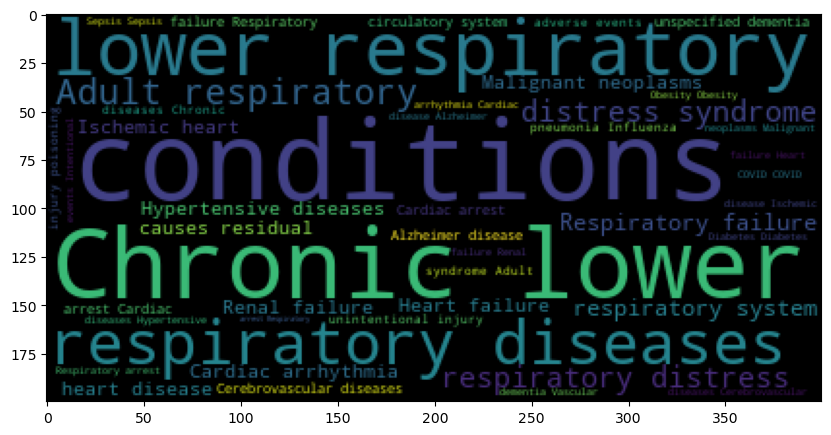

In [123]:
# import word cloud
from wordcloud import WordCloud

sentences = dataset3["Condition"].tolist()
sentences_as_a_string = ' '.join(sentences)


# Convert the string into WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(sentences_as_a_string))